In [180]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [181]:
files = glob(os.path.join('.', '*.csv'))
dfs = []

for file in files:
    with open(file, 'r') as f:
        print(file)
        df = pd.read_csv(f)
        df.columns = ['id', 'class']
        dfs.append(df)

train_dfs = dfs[:3]
valid_dfs = dfs[3:]

.\train-abnormal.csv
.\train-acl.csv
.\train-meniscus.csv
.\valid-abnormal.csv
.\valid-acl.csv
.\valid-meniscus.csv


In [182]:
print(train_dfs[0].shape)
print(valid_dfs[0].shape)

(1129, 2)
(119, 2)


# 각 task train/valid 비율

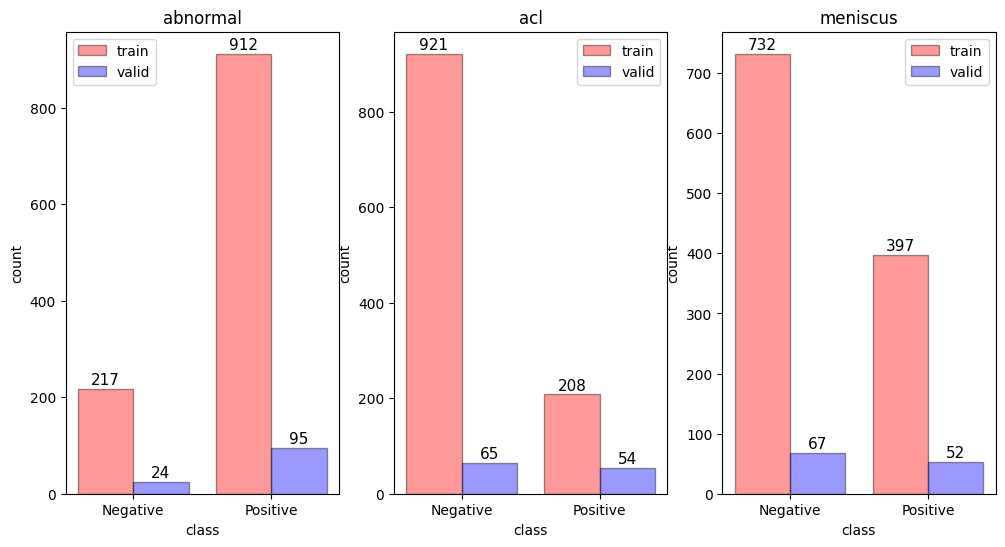

In [183]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax_titles = ['abnormal', 'acl', 'meniscus']

idx = np.arange(2)
ax_list = [ax1, ax2, ax3]
bar_width = 0.4
for train, valid, ax, title in zip(train_dfs, valid_dfs, ax_list, ax_titles):
    t_values = train['class'].value_counts().sort_index().values
    v_values = valid['class'].value_counts().sort_index().values

    ax.bar(idx, t_values, bar_width, color='red', label='train', edgecolor='black', alpha=.4)
    ax.bar(idx+bar_width, v_values, bar_width, color='blue', label='valid', edgecolor='black', alpha=.4)

    for i, val in enumerate(t_values):
        ax.text(x=i, y=val+3, s=val, va='bottom', ha='center', fontsize=11)
    for i, val in enumerate(v_values):
        ax.text(x=i+bar_width, y=val+3, s=val, va='bottom', ha='center', fontsize=11)

    ax.set_title(title)
    ax.set_xticks(np.arange(bar_width/2, 1+bar_width, 1), idx)
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_ylabel('count')
    ax.set_xlabel('class')
    ax.legend()

plt.show()

---------

In [184]:
t_abnormal = train_dfs[0]
t_acl = train_dfs[1]
t_meniscus = train_dfs[2]
v_abnormal = valid_dfs[0]
v_acl = valid_dfs[1]
v_meniscus = valid_dfs[2]

In [185]:
t_abnormal.info()
t_acl.info()
t_meniscus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1129 non-null   int64
 1   class   1129 non-null   int64
dtypes: int64(2)
memory usage: 17.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1129 non-null   int64
 1   class   1129 non-null   int64
dtypes: int64(2)
memory usage: 17.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1129 non-null   int64
 1   class   1129 non-null   int64
dtypes: int64(2)
memory usage: 17.8 KB


In [186]:
v_abnormal.info()
v_acl.info()
v_meniscus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      119 non-null    int64
 1   class   119 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      119 non-null    int64
 1   class   119 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      119 non-null    int64
 1   class   119 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [187]:
t_id_df = pd.DataFrame({'t_abnormal' : t_abnormal['id'],
                      't_acl' : t_acl['id'],
                      't_meniscus' : t_meniscus['id']})

t_ab_acl = t_id_df['t_abnormal'] == t_id_df['t_acl']
t_acl_men = t_id_df['t_acl'] == t_id_df['t_meniscus']
t_id_df['check'] = t_ab_acl == t_acl_men

t_id_df['check'].value_counts()

check
True    1129
Name: count, dtype: int64

In [188]:
v_id_df = pd.DataFrame({'v_abnormal' : v_abnormal['id'],
                      'v_acl' : v_acl['id'],
                      'v_meniscus' : v_meniscus['id']})

v_ab_acl = v_id_df['v_abnormal'] == v_id_df['v_acl']
v_acl_men = v_id_df['v_acl'] == v_id_df['v_meniscus']
v_id_df['check'] = v_ab_acl == v_acl_men

v_id_df['check'].value_counts()

check
True    119
Name: count, dtype: int64

In [189]:
classes = {0 : [0,0,0], 1 : [0,0,1], 2 : [0,1,0], 3 : [0,1,1], 4 : [1,0,0], 5 : [1,0,1], 6 : [1,1,0], 7 : [1,1,1]}
# [abnormal, acl, meniscus]

In [190]:
t_class_df = pd.DataFrame({'abnormal' : t_abnormal['class'], 'acl' : t_acl['class'], 'meniscus' : t_meniscus['class']})
t_class_df['class'] = [[k for k, v in classes.items() 
                        if v == [t_class_df['abnormal'].iloc[i], t_class_df['acl'].iloc[i], t_class_df['meniscus'].iloc[i]]][0]
                        for i in range(t_class_df.shape[0])]
t_class_df

,abnormal,acl,meniscus,class
0,1,1,1,7
1,1,0,0,4
2,1,0,1,5
3,1,0,0,4
4,1,0,1,5
...,...,...,...,...
1124,1,0,1,5
1125,1,0,1,5
1126,0,0,0,0
1127,1,0,0,4


In [191]:
# 멀티 클래스로 전환시 class
t_class_df['class'].value_counts().sort_index().to_frame()

,count
class,
0,217
4,432
5,272
6,83
7,125


### Train 분석
- abnormal 아닐 때, 즉 정상일 때 acl, meniscus 인 경우는 존재하지 않음
- abnormal 일 때 acl이나 meniscus인 경우가 432개로 가장 많음
    - 기타의 경우가 가장 많다

---

In [192]:
v_class_df = pd.DataFrame({'abnormal' : v_abnormal['class'], 'acl' : v_acl['class'], 'meniscus' : v_meniscus['class']})
v_class_df['class'] = [[k for k, v in classes.items() 
                        if v == [v_class_df['abnormal'].iloc[i], v_class_df['acl'].iloc[i], v_class_df['meniscus'].iloc[i]]][0]
                        for i in range(v_class_df.shape[0])]
v_class_df

,abnormal,acl,meniscus,class
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
114,1,1,1,7
115,1,1,1,7
116,1,0,1,5
117,1,1,1,7


In [193]:
# 멀티 클래스로 전환시 class
v_class_df['class'].value_counts().sort_index().to_frame()

,count
class,
0,24
4,20
5,21
6,23
7,31


### Valid 분석
- abnormal 아닐 때, 즉 정상일 때 acl, meniscus 인 경우는 존재하지 않음
- 존재하는 경우들은 대체로 비슷한 수치를 보임